In [1]:
#import matplotlib
#matplotlib.use('Agg')  # Use Agg,Qt5Agg,TkAgg backend,Qt5Agg,TkAgg
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# Generate test data
test_x = tf.range(1, 10, 0.1)
test_y = (test_x * tf.math.log(test_x)) ** 3 / 2
test_y = tf.reshape(test_y, shape=(test_y.shape[0], 1))

# Convert Tensorflow tensors to numpy arrays
test_x_np = test_x.numpy()
test_y_np = test_y.numpy()

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=(1,)),  # Input shape needs to be specified for single-dimensional input
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss="mae",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                   metrics=["mae"])

# Fit the model
model.fit(test_x, test_y, epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 8ms/step - loss: 1209.6862 - mae: 1209.6862
Epoch 2/10
3/3 [==============================] - 0s 7ms/step - loss: 1180.4414 - mae: 1180.4414
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 1137.2395 - mae: 1137.2395
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 1077.0215 - mae: 1077.0215
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 1008.5159 - mae: 1008.5159
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 961.7376 - mae: 961.7377
Epoch 7/10
3/3 [==============================] - 0s 5ms/step - loss: 921.0342 - mae: 921.0342
Epoch 8/10
3/3 [==============================] - 0s 7ms/step - loss: 892.8357 - mae: 892.8357
Epoch 9/10
3/3 [==============================] - 0s 7ms/step - loss: 884.9067 - mae: 884.9067
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 878.7796 - mae: 878.7796


In [2]:
#Split the data into test set and train set
x_train = test_x[:72]
y_train = test_y[:72]

x_test = test_x[72:]
y_test = test_y[72:]
y_train = tf.reshape(y_train, shape=(y_train.shape[0], 1))
len(x_train), len(y_train), len(x_test), len(x_test)

(72, 72, 18, 18)

In [3]:
#plt.figure(figsize=(10, 7))
#plt.scatter(x_train, y_train, c="b", label="Training data")
#plt.scatter(x_test, y_test, c="g", label="Testing data")
#plt.legend()
#plt.show()

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


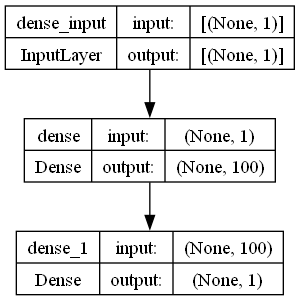

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [15]:
#Create a model
tf.random.set_seed(42)

model_test = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu", input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

#Compile the model
model_test.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=1),
                    metrics=["mae"])
#Fit the moodel
model_test.fit(x_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 1s 8ms/step - loss: 447.9181 - mae: 447.9181
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 454.7609 - mae: 454.7609
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 399.9835 - mae: 399.9835
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 400.8612 - mae: 400.8612
Epoch 5/50
3/3 [==============================] - 0s 7ms/step - loss: 356.4301 - mae: 356.4301
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 309.9925 - mae: 309.9925
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 321.5172 - mae: 321.5172
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 239.5481 - mae: 239.5481
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 233.8813 - mae: 233.8813
Epoch 10/50
3/3 [==============================] - 0s 7ms/step - loss: 227.2305 - mae: 227.2305
Epoch 11/50
3/3 [==============================] 

In [7]:
tf.constant([1, 2, 3]).ndim

1

In [8]:
model_test.predict([2])

1/1 [==============================] - 0s 373ms/step


array([[1.0509142]], dtype=float32)

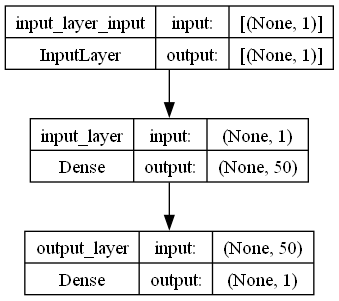

In [9]:
from tensorflow.keras.utils  import plot_model
plot_model(model=model_test, show_shapes=True)

In [10]:
model_test.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Visualize our model's predictions
y_pred= model_test.predict(x_test)
y_pred

1/1 [==============================] - 0s 181ms/step


array([[2500.5703],
       [2576.7095],
       [2652.8484],
       [2728.9873],
       [2805.1265],
       [2881.2654],
       [2957.4043],
       [3033.5435],
       [3109.6821],
       [3185.8213],
       [3261.96  ],
       [3338.0994],
       [3414.2383],
       [3490.377 ],
       [3566.516 ],
       [3642.6553],
       [3718.7942],
       [3794.9329]], dtype=float32)

In [12]:
y_test

<tf.Tensor: shape=(18, 1), dtype=float32, numpy=
array([[2568.2112],
       [2709.615 ],
       [2856.6938],
       [3009.591 ],
       [3168.454 ],
       [3333.4287],
       [3504.6655],
       [3682.3127],
       [3866.5217],
       [4057.4487],
       [4255.2466],
       [4460.0703],
       [4672.08  ],
       [4891.4336],
       [5118.2925],
       [5352.8184],
       [5595.1753],
       [5845.5264]], dtype=float32)>

In [13]:
#Let's create a plotting function
def plot_preds(train_data=x_train, train_labels=y_train,
              test_data=x_test, test_labels=y_test,
              preds=y_pred):
    plt.figure(figsize=(10, 7))
    #Plot training in blue
    plt.scatter(train_data, train_labels, c="b",label="Training data")
    #Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    #Plot model's predictions in red
    plt.scatter(test_data, preds, c="r", label="Predictions")
    #Show legend
    plt.legend();

In [18]:
#Evaluation our model's predictions with regression evalution metrics
#We evaluate the model performance
model_test.evaluate(x_test, y_test)

1/1 [==============================] - 0s 409ms/step - loss: 904.8918 - mae: 904.8918


[904.891845703125, 904.891845703125]

In [35]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)

(<tf.Tensor: shape=(18,), dtype=float32, numpy=
 array([  67.64087,  132.90552,  203.84546,  280.60376,  363.32764,
         452.16333,  547.2612 ,  648.7693 ,  756.8396 ,  871.62744,
         993.2866 , 1121.971  , 1257.8418 , 1401.0566 , 1551.7764 ,
        1710.1631 , 1876.3811 , 2050.5935 ], dtype=float32)>,
 <tf.Tensor: shape=(18,), dtype=float32, numpy=
 array([  67.64087,  132.90552,  203.84546,  280.60376,  363.32764,
         452.16333,  547.2612 ,  648.7693 ,  756.8396 ,  871.62744,
         993.2866 , 1121.971  , 1257.8418 , 1401.0566 , 1551.7764 ,
        1710.1631 , 1876.3811 , 2050.5935 ], dtype=float32)>)

In [28]:
y_test-y_pred

<tf.Tensor: shape=(18, 1), dtype=float32, numpy=
array([[  67.64087],
       [ 132.90552],
       [ 203.84546],
       [ 280.60376],
       [ 363.32764],
       [ 452.16333],
       [ 547.2612 ],
       [ 648.7693 ],
       [ 756.8396 ],
       [ 871.62744],
       [ 993.2866 ],
       [1121.971  ],
       [1257.8418 ],
       [1401.0566 ],
       [1551.7764 ],
       [1710.1631 ],
       [1876.3811 ],
       [2050.5935 ]], dtype=float32)>

In [31]:
tf.math.reduce_mean(mae)

<tf.Tensor: shape=(), dtype=float32, numpy=904.89185>

In [34]:
#Mean square error
mse = tf.losses.MSE(y_test, y_pred)
mse

<tf.Tensor: shape=(18,), dtype=float32, numpy=
array([   4575.287,   17663.877,   41552.973,   78738.47 ,  132006.97 ,
        204451.67 ,  299494.84 ,  420901.6  ,  572806.2  ,  759734.4  ,
        986618.3  , 1258818.8  , 1582166.   , 1962959.8  , 2408010.   ,
       2924657.8  , 3520806.   , 4204933.5  ], dtype=float32)>

In [36]:
tf.math.reduce_mean(mse)

<tf.Tensor: shape=(), dtype=float32, numpy=1187827.5>

In [50]:
#Functions for mae and mse
def mae(y_true, y_pred):
    return tf.math.reduce_mean(tf.metrics.mean_absolute_error(y_true, y_pred))

def mse(y_true, y_pred):
    return tf.math.reduce_mean(tf.metrics.mean_squared_error(y_true, y_pred))

In [51]:
mae(y_test, y_pred), mse(y_test, y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=904.89185>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1187827.5>)

In [ ]:
#Rnning experiments to improve our model
